**The goal** of this project is to scrape the website containg data about the best hotels in the world.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen

In [31]:
from selenium import webdriver

In [41]:
import time

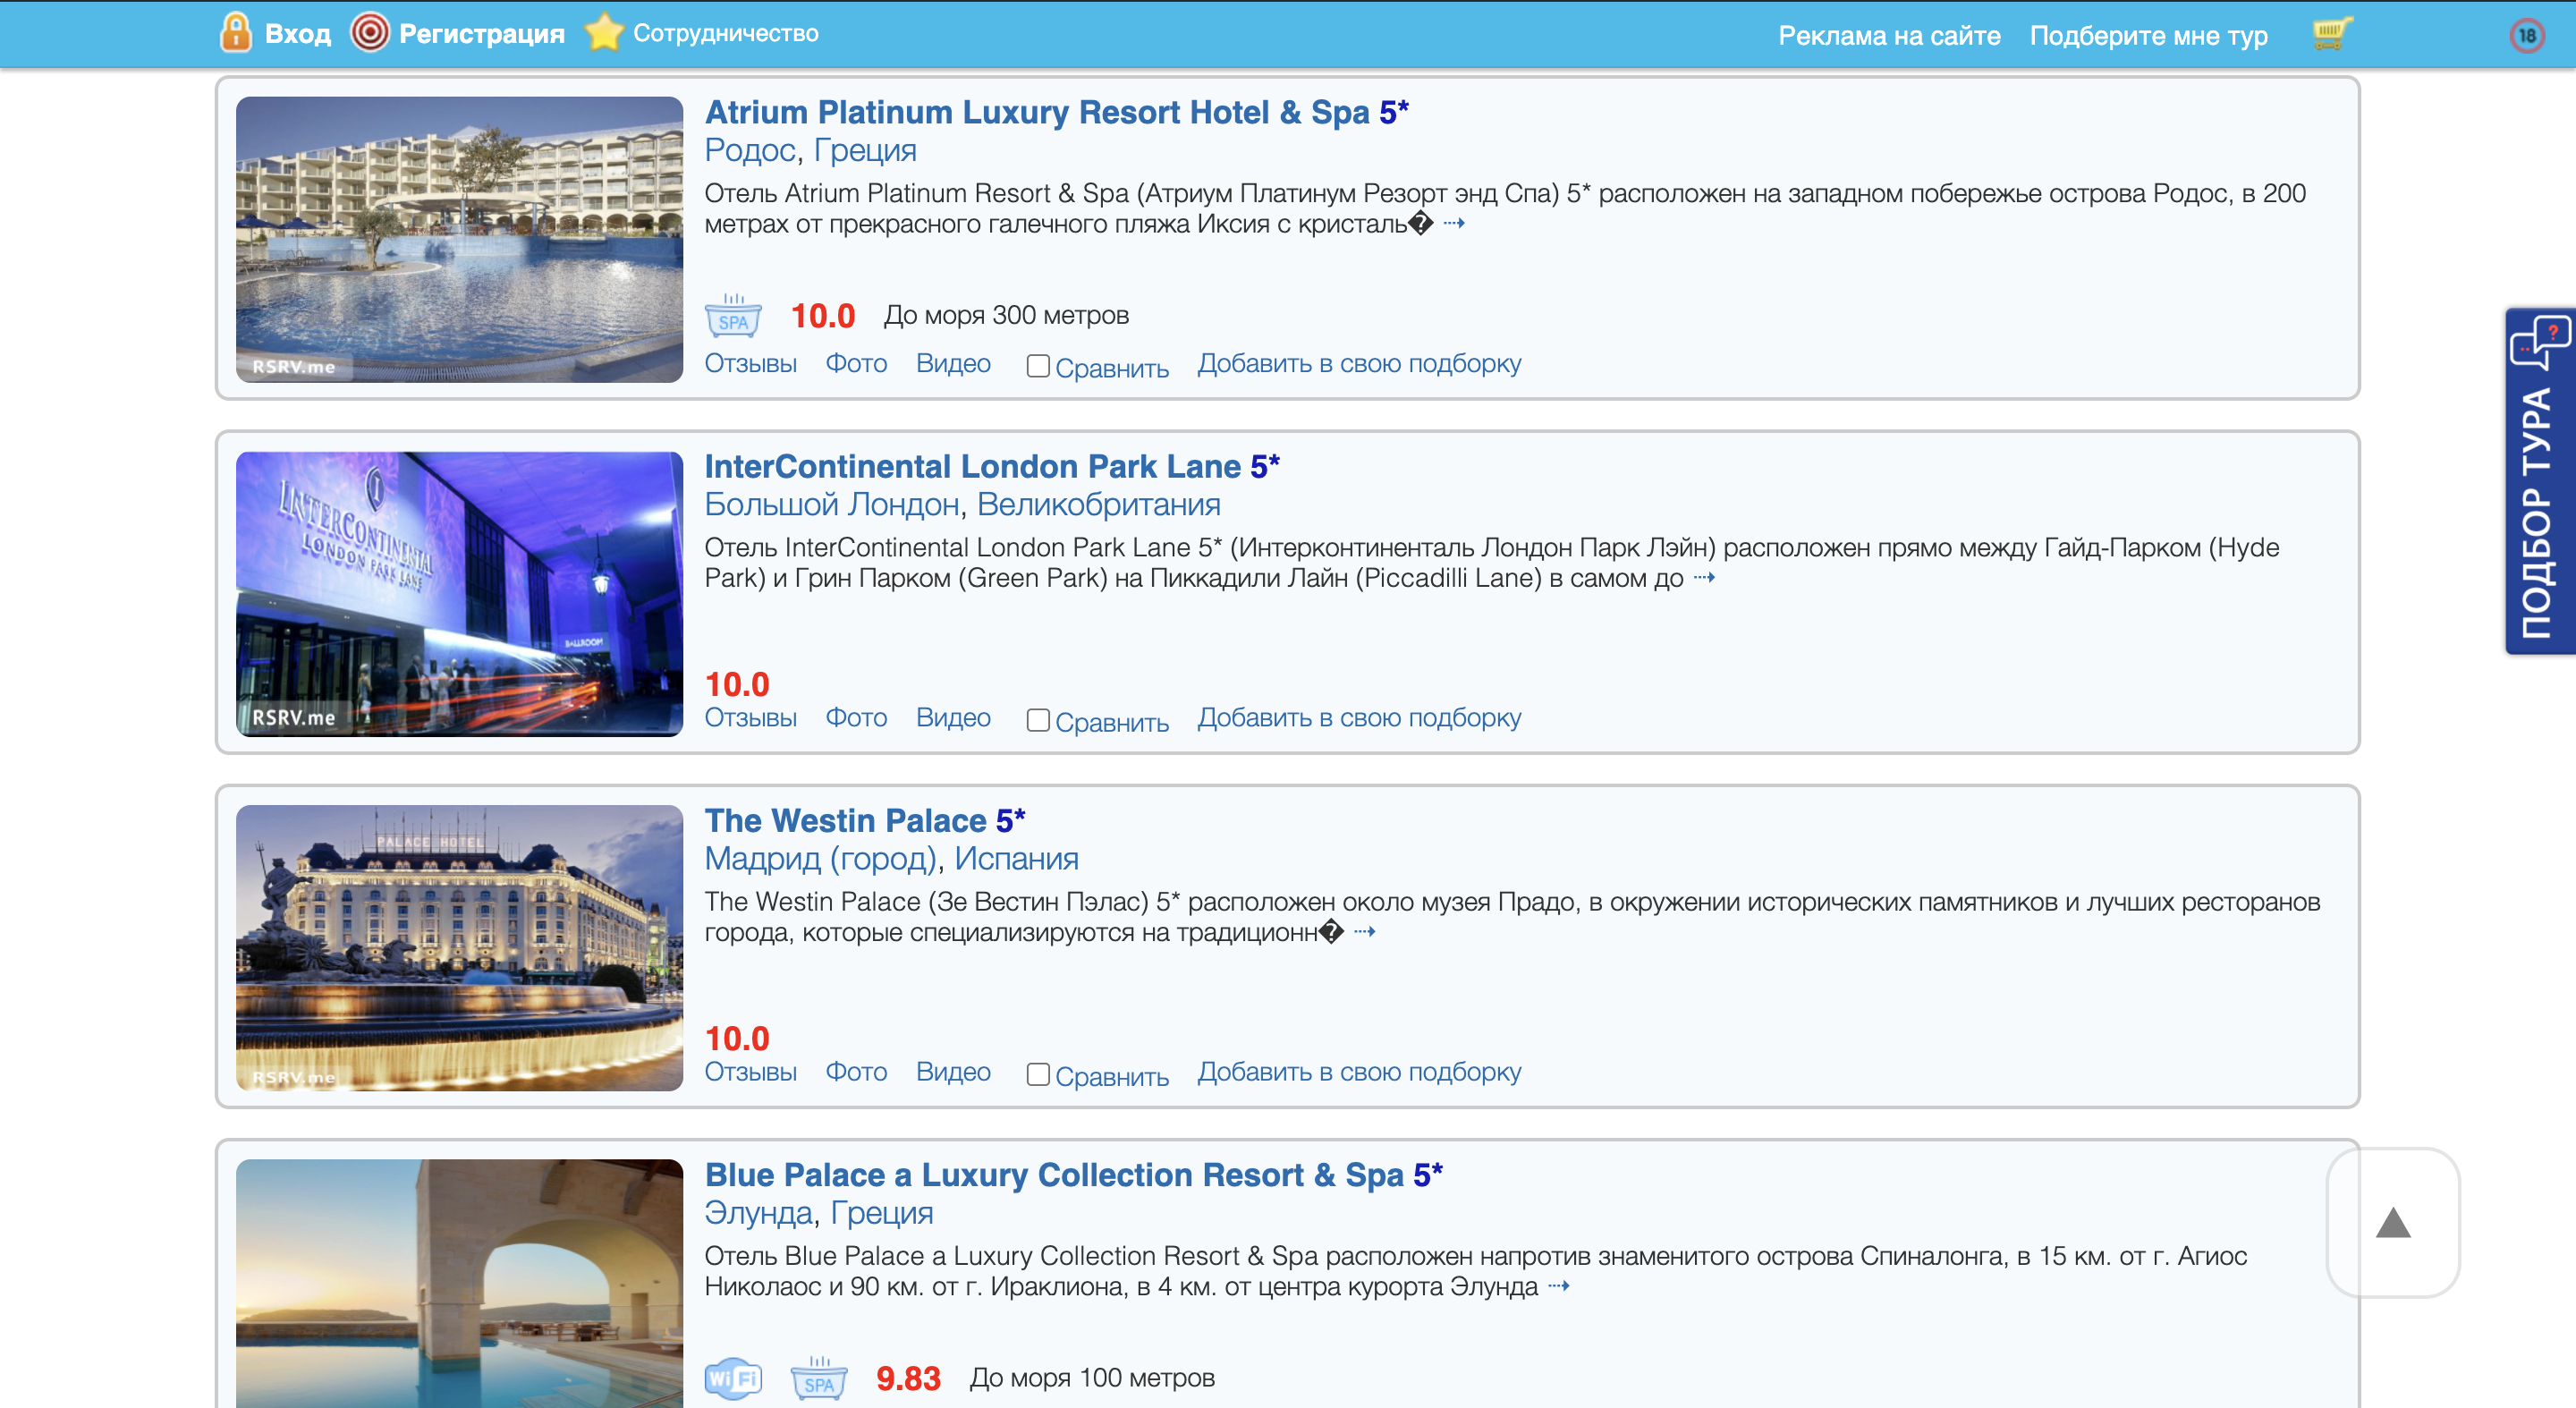

From the website provided above we are gonna retrieve hotel name, link, city, country, and rating. Then, after visiting the retrieved link, we will extract the whole description of the hotel.

Due to some website security settings, request library is unable to download all html code, hence, another library called **selenium** is required.

In [68]:
options = webdriver.ChromeOptions()
    #options.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36")

try:
    driver = webdriver.Chrome(
         executable_path="/Users/polyanaboss/Desktop/chromedriver",
         options=options
     )
    driver.get(url="https://www.tury.ru/hotel/most_luxe.php")
    time.sleep(5)

    with open("index_selenium.html", "w") as file:
         file.write(driver.page_source)

except Exception as ex:
        print(ex)
finally:
    driver.close()
    driver.quit()
with open("index_selenium.html") as file:
    src = file.read()
    soup2 = BeautifulSoup(src, "lxml")

In [84]:
names = [] #empty lists for each attribute
links = []
cities = []
countries = []
ratings = []
descriptions = []
for i, hotel_info in enumerate(soup2.find_all("div", class_="hotel_card_dv"), 1):
    name = hotel_info.find('a', class_ = 'hotel_name').find('b').text.strip()
    link = "https://www.tury.ru" + hotel_info.find("a")['href']
    city = hotel_info.find("a", class_ = 'resort loc').text.strip()
    country = hotel_info.find("a", class_ = 'country loc').text.strip()
    try:    
        rating = hotel_info.find('ul', class_ = 'rsrvme_hc_hotel_links').find('li', title = 'Рейтинг').find('a').find('b').text
    except:
        rating = ''
    html_desc = requests.get(link)
    soup_html = BeautifulSoup(html_desc.content, 'lxml')
    
    try:
        desc = soup_html.find('div', itemprop = 'description').text.strip()
    except:
        desc = ''
    
    #appending the values
    names.append(name)
    links.append(link)
    cities.append(city)
    countries.append(country)
    ratings.append(rating)
    descriptions.append(desc)
    
    print(f'Hotel #{i} is scraped successfully') #for tracing the process

Hotel #1 is scraped successfully
Hotel #2 is scraped successfully
Hotel #3 is scraped successfully
Hotel #4 is scraped successfully
Hotel #5 is scraped successfully
Hotel #6 is scraped successfully
Hotel #7 is scraped successfully
Hotel #8 is scraped successfully
Hotel #9 is scraped successfully
Hotel #10 is scraped successfully
Hotel #11 is scraped successfully
Hotel #12 is scraped successfully
Hotel #13 is scraped successfully
Hotel #14 is scraped successfully
Hotel #15 is scraped successfully
Hotel #16 is scraped successfully
Hotel #17 is scraped successfully
Hotel #18 is scraped successfully
Hotel #19 is scraped successfully
Hotel #20 is scraped successfully
Hotel #21 is scraped successfully
Hotel #22 is scraped successfully
Hotel #23 is scraped successfully
Hotel #24 is scraped successfully
Hotel #25 is scraped successfully
Hotel #26 is scraped successfully
Hotel #27 is scraped successfully
Hotel #28 is scraped successfully
Hotel #29 is scraped successfully
Hotel #30 is scraped su

In [87]:
#creating the dataframe
df = pd.DataFrame({'name' : names,
                  'link' : links,
                  'city' : cities,
                  'country' : countries,
                  'rating' : ratings,
                  "description" : descriptions})

df.head()

,name,link,city,country,rating,description
0,Atrium Platinum Luxury Resort Hotel & Spa 5*,https://www.tury.ru/hotel/id/101266-atrium-pla...,Родос,Греция,10.0,Отель Atrium Platinum Resort & Spa (Атриум Пла...
1,InterContinental London Park Lane 5*,https://www.tury.ru/hotel/id/33663-intercontin...,Большой Лондон,Великобритания,10.0,
2,The Westin Palace 5*,https://www.tury.ru/hotel/id/408802-the-westin...,Мадрид (город),Испания,10.0,The Westin Palace (Зе Вестин Пэлас) 5* располо...
3,Blue Palace a Luxury Collection Resort & Spa 5*,https://www.tury.ru/hotel/id/55513-blue-palace...,Элунда,Греция,9.83,
4,Ayana Resort and SPA 5*,https://www.tury.ru/hotel/id/72489-ayana-resor...,Джимбаран,Индонезия,9.77,Отель Ayana Resort & SPA 5*(Айана Ресорт энд С...


In [88]:
#saving file to csv
df.to_csv('hotels.csv')